In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('co2emission dataset.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Create a 'year' column for easy yearly aggregation
df['year'] = df['date'].dt.year

df.set_index('date', inplace=True)
df.sort_index(inplace=True)


# Show the first few rows of the DataFrame to confirm changes
print(df.head())
print("  ")
print(df.info())
+


              country       sector     value   timestamp  year
date                                                          
2019-01-01     Brazil        Power  0.096799  1546300800  2019
2019-01-01    Germany  Residential  0.553149  1546300800  2019
2019-01-01     France  Residential  0.329052  1546300800  2019
2019-01-01  EU27 & UK  Residential  2.579280  1546300800  2019
2019-01-01      China  Residential  4.348890  1546300800  2019
  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135408 entries, 2019-01-01 to 2023-05-31
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   sector     135408 non-null  object 
 2   value      135408 non-null  float64
 3   timestamp  135408 non-null  int64  
 4   year       135408 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 5.7+ MB
None


In [28]:
# Unique countries and sectors in the dataset
unique_countries = df['country'].unique()
unique_sectors = df['sector'].unique()

unique_countries, unique_sectors

(array(['Brazil', 'Germany', 'France', 'EU27 & UK', 'China', 'WORLD', 'US',
        'UK', 'Spain', 'Russia', 'ROW', 'Japan', 'Italy', 'India'],
       dtype=object),
 array(['Power', 'Residential', 'Ground Transport', 'Industry',
        'International Aviation', 'Domestic Aviation'], dtype=object))

In [48]:

# Data Summary:

# Assuming 'df' is already loaded and preprocessed up to this point
# Check the DataFrame structure
print(df.columns)

# Calculate the number of entries (rows) in the dataset
num_entries = len(df)  # Number of rows in the dataset

# Calculate the number of unique countries in the 'country' column
num_countries = df['country'].nunique()  # Number of unique countries in the dataset

# Calculate the number of unique sectors in the 'sector' column
num_sectors = df['sector'].nunique()  # Number of unique sectors in the dataset

# Determine the range of dates in the 'date' column (from the earliest to the latest date)
# Adjust based on whether 'date' is a column or index
if 'date' in df.columns:
    date_range = (df['date'].min(), df['date'].max())  # The earliest and latest dates in the dataset
else:
    date_range = (df.index.min(), df.index.max())  # The earliest and latest dates in the index

# Check for missing values in each column
missing_values = df.isnull().sum()  # Count of missing values per column

# Outputs:
# num_entries: Total number of entries in the dataset
# num_countries: Total number of unique countries
# num_sectors: Total number of unique sectors
# date_range: Tuple with the earliest and latest date in the dataset
# missing_values: Series showing the number of missing values in each column

# Display summary statistics
print(f"Number of entries: {num_entries}")
print(f"Number of unique countries: {num_countries}")
print(f"Number of unique sectors: {num_sectors}")
print(f"Date range: {date_range}")
print("Missing values in each column:")
print(missing_values)

Index(['country', 'sector', 'value', 'timestamp', 'year'], dtype='object')
Number of entries: 135408
Number of unique countries: 14
Number of unique sectors: 6
Date range: (Timestamp('2019-01-01 00:00:00'), Timestamp('2023-05-31 00:00:00'))
Missing values in each column:
country      0
sector       0
value        0
timestamp    0
year         0
dtype: int64


In [49]:
country = 'India'
sector = 'Power'

filtered_data = df[(df['country'] == country) & (df['sector'] == sector)]

filtered_data 

,country,sector,value,timestamp,year
date,,,,,
2019-01-01,India,Power,3.34922,1546300800,2019
2019-01-02,India,Power,3.39020,1546387200,2019
2019-01-03,India,Power,3.42797,1546473600,2019
2019-01-04,India,Power,3.46134,1546560000,2019
2019-01-05,India,Power,3.43529,1546646400,2019
...,...,...,...,...,...
2023-05-27,India,Power,3.99945,1685145600,2023
2023-05-28,India,Power,4.12880,1685232000,2023
2023-05-29,India,Power,4.48099,1685318400,2023


In [105]:
import pandas as pd

# Assuming df_india is your DataFrame and it has a DateTime index
# Ensure the index is DateTime
df_india.index = pd.to_datetime(df_india.index)
# Converts the index of df_india to a DateTimeIndex to ensure it is in the correct format for time-based operations.
# This conversion is crucial for resampling and other time-related calculations, allowing accurate aggregation by time periods.

# Select only numeric columns for aggregation
numeric_columns = df_india.select_dtypes(include=['number']).columns
# Filters the DataFrame to include only columns with numeric data types (e.g., int, float).
# Aggregation functions like mean() are applied to numeric columns, so non-numeric columns are excluded to avoid errors and irrelevant calculations.

# Resample to yearly frequency and calculate the mean for numeric columns
yearly_data = df_india[numeric_columns].resample('YE').mean()
# Resamples the data to an annual frequency ('YE' stands for annual) and calculates the mean for each year.
# This aggregates daily data into yearly averages, simplifying the data and highlighting long-term trends.
# Averaging over a year helps in reducing the noise and volatility seen in daily data.

# Reset index to have 'year' as a column if needed
yearly_data = yearly_data.reset_index()
# Resets the DataFrame index, moving the DateTime index (representing years) into a column named 'date'.
# This action makes it easier to manipulate and analyze the data as the DateTime index becomes a regular column.

# Add a 'year' column extracted from the index
yearly_data['year'] = yearly_data['date'].dt.year
# Extracts the year from the 'date' column (formerly the index) and creates a new column 'year'.
# This simplifies access to the year for analysis or plotting by providing a straightforward year identifier.

# Display the first few rows of the yearly DataFrame
print(yearly_data.head())
# Prints the first few rows of the `yearly_data` DataFrame to verify the results of resampling and aggregation.
# This helps in ensuring that the data has been processed correctly and meets expectations.

# What Happened:
# You Resampled Your Data:
# - You took your original daily data and resampled it into yearly chunks. Instead of looking at daily data,
#   you averaged the data for each year. For example, you averaged the data from January to December for each year,
#   resulting in one average value per year.
# The Resulting Table:
# - Your table now has data summarized by the end of each year.
# What the Columns Mean:
# date:
# - This column represents the end of each year, which was previously the index. For example, '2019-12-31' 
#   indicates that the data is aggregated for the year 2019.
# value:
# - This shows the average of your numeric data (like CO2 emissions) for each year. For instance, 1.293703 
#   for the year 2019 means that the average CO2 emission value for 2019 was around 1.293703.
# year:
# - This shows the year extracted from the 'date' column. For example, 2019 indicates that this data is from the year 2019.
# Example in Plain Terms:
# For the year 2019:
# - The average CO2 emission (or other numeric measure) for the year was 1.293703.
# - The 'date' column provides the end of the year date, which is useful for understanding the aggregation period.
# - The 'year' column directly tells you the year of the data, which simplifies analysis and reporting.
# What To Do Next:
# - Verify the 'date' Column: Ensure that this column accurately reflects the end of each year. If the column is not needed,
#   you can remove it or use it for verification.
# - Focus on the 'value': This is your main interest—the yearly average CO2 emissions.
# - Use the 'year' Column: This column is useful for any analysis or reporting where you need to identify the specific year.


        date     value     timestamp  year
0 2019-12-31  1.128624  1.562026e+09  2019
1 2020-12-31  1.031309  1.593605e+09  2020
2 2021-12-31  1.135841  1.625184e+09  2021
3 2022-12-31  1.215796  1.656720e+09  2022
4 2023-12-31  1.348162  1.679011e+09  2023


In [106]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Preprocess Data:

# Handle Missing Values:
# Impute missing values using forward-fill method. This helps to maintain continuity in the time series data.
yearly_data.ffill(inplace=True)  # Forward-fill method
# Alternatively, you could use backward-fill:
# yearly_data.bfill(inplace=True)

# This line fills any missing data in the DataFrame by carrying forward the last known value.
# For example, if there is a missing value for 2020 but there is data for 2019, it will use the 2019 value for 2020.
# This is helpful in time series data to maintain continuity of information.
# The alternative method, backward-fill, would use the next known value instead of the previous one.

# Normalize Data:
# Normalize the numeric columns to ensure that they are on the same scale, which is important for many models and analyses.
# Here, we use MinMaxScaler to scale data to a range between 0 and 1.
scaler = MinMaxScaler()
# Apply normalization only to existing numeric columns
yearly_data[numeric_columns] = scaler.fit_transform(yearly_data[numeric_columns])

# This section scales the numeric data in the DataFrame to a range from 0 to 1.
# Normalization ensures that all numeric columns are on the same scale, which is crucial for many statistical models and machine learning algorithms.
# For example, if CO2 emissions were originally in the range of 0 to 1000, after normalization they will be scaled to be between 0 and 1.

# Recreate the 'year' column from the DateTime index
yearly_data['year'] = yearly_data['date'].dt.year

# This line extracts the year from the 'date' column (which was previously the index) and creates a new column 'year' to store it.
# This is useful for any analysis or modeling that needs to reference the year separately.

# Date Formatting:
# Ensure the Date/Time column is in a proper datetime format for time series analysis.
# We have already set 'date' as the index and ensured it's in a datetime format.
# No additional date formatting is needed here, as we've handled it during data resampling.

# We previously set the 'date' as the index and made sure it was in datetime format. This ensures that any time-based operations or analyses are performed correctly.

# Show the final processed DataFrame
print(yearly_data.head())

# This line prints the first few rows of the processed DataFrame so you can review the changes and verify that the data has been correctly processed.



        date     value  timestamp  year
0 2019-12-31  0.307130   0.000000  2019
1 2020-12-31  0.000000   0.269941  2020
2 2021-12-31  0.329906   0.539882  2021
3 2022-12-31  0.582247   0.809453  2022
4 2023-12-31  1.000000   1.000000  2023


In [107]:
print(yearly_data.columns)



Index(['date', 'value', 'timestamp', 'year'], dtype='object')


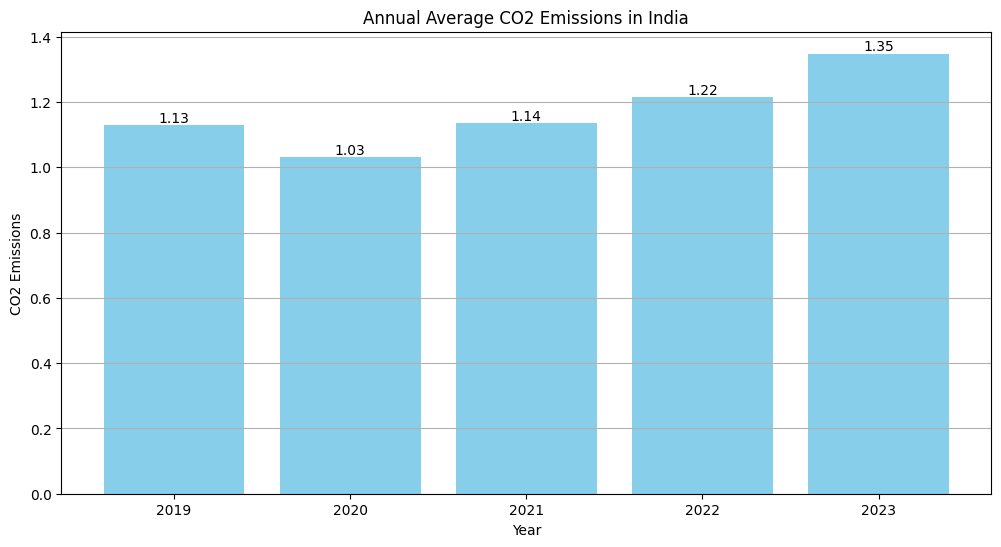

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your main DataFrame and it has a DateTime index
# Filter data for India
df_india = df[df['country'] == 'India'].copy()  # Make a copy to avoid modifying a slice

# Ensure the index is DateTime
df_india.index = pd.to_datetime(df_india.index)

# Extract the year from the index and create a new column 'year'
df_india['year'] = df_india.index.year

# Group the data by year and calculate the mean CO2 emissions
annual_emissions = df_india.groupby('year')['value'].mean()

# Plot bar chart for annual CO2 emissions in India
plt.figure(figsize=(12, 6))  # Set the size of the figure
bars = plt.bar(annual_emissions.index, annual_emissions, color='skyblue')  # Create a bar chart

# Add data labels on each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar, representing the average CO2 emissions
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    # Add a label on top of each bar displaying the average emissions value.

plt.title('Annual Average CO2 Emissions in India')  # Set the title of the plot
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('CO2 Emissions')  # Label the y-axis
plt.grid(True, axis='y')  # Add a grid for the y-axis to enhance readability
plt.show()  # Display the plot


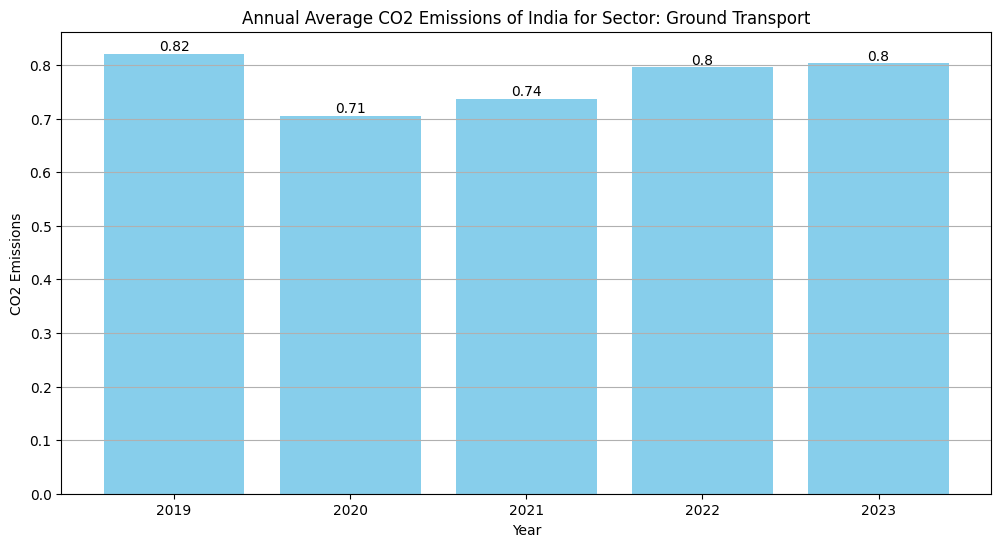

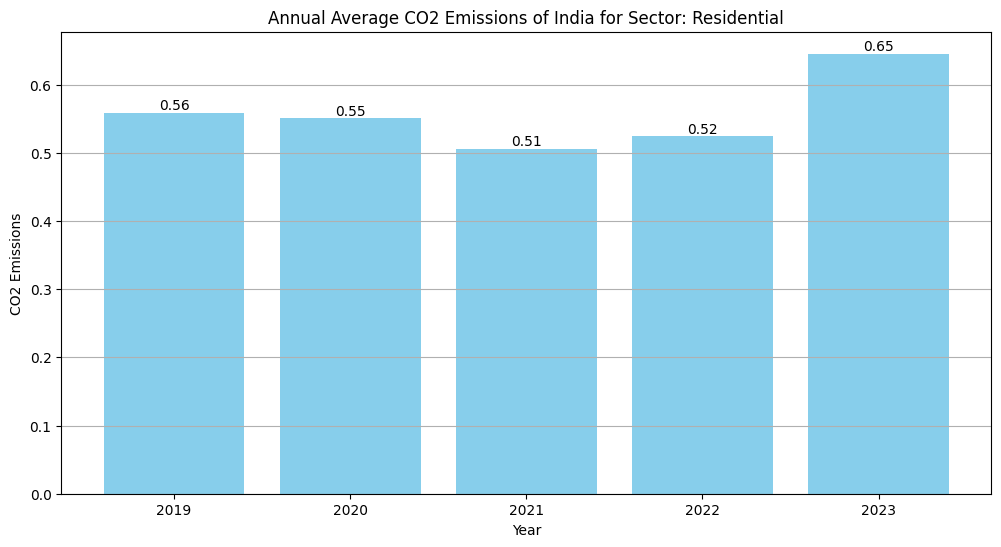

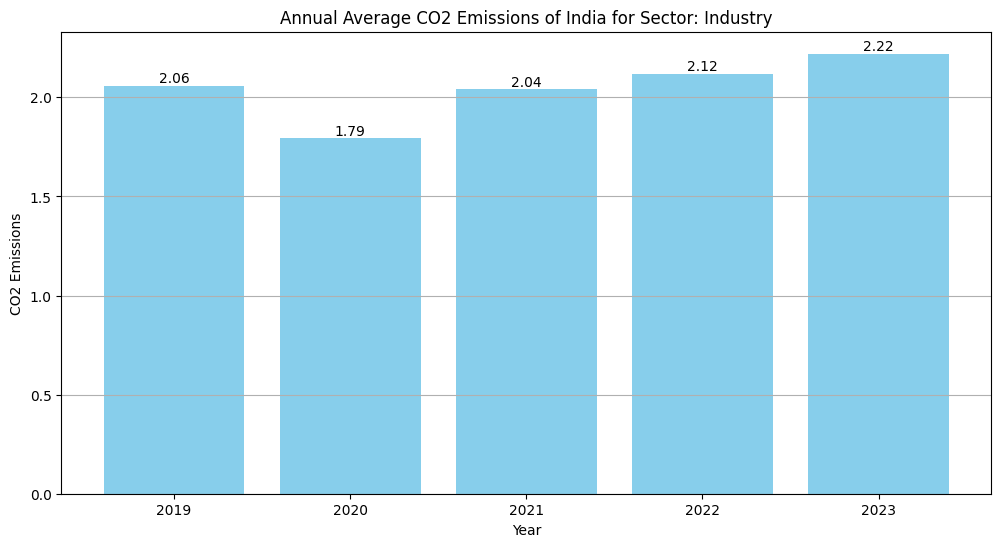

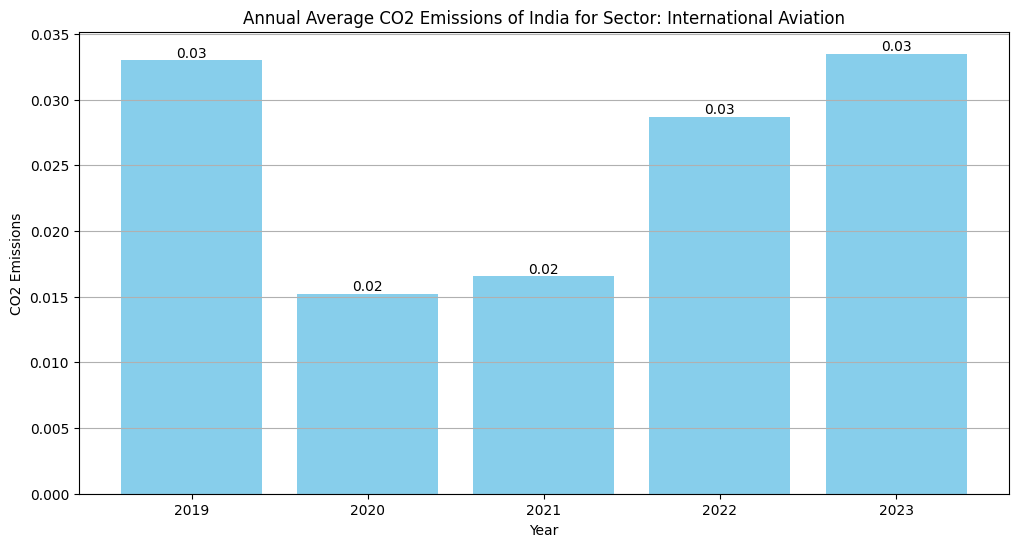

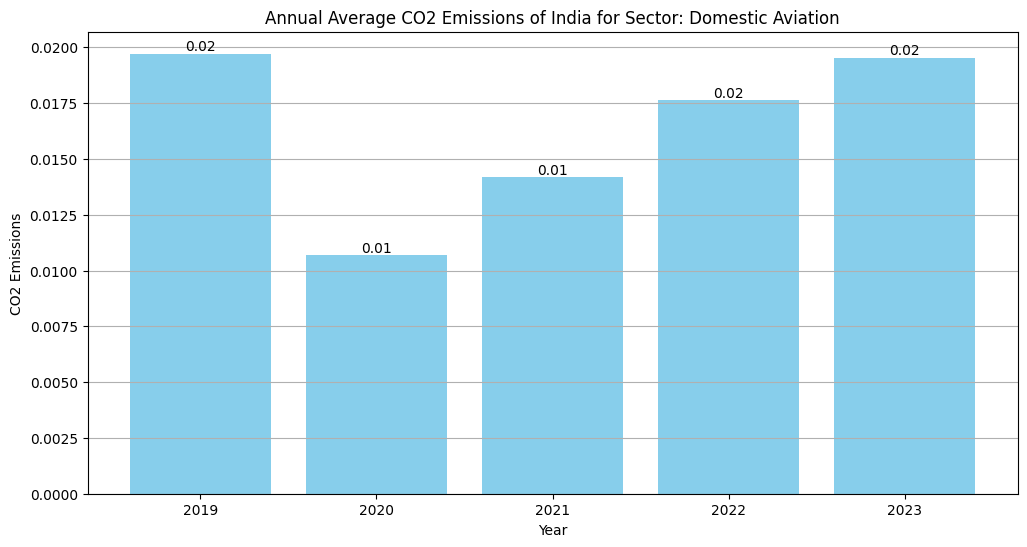

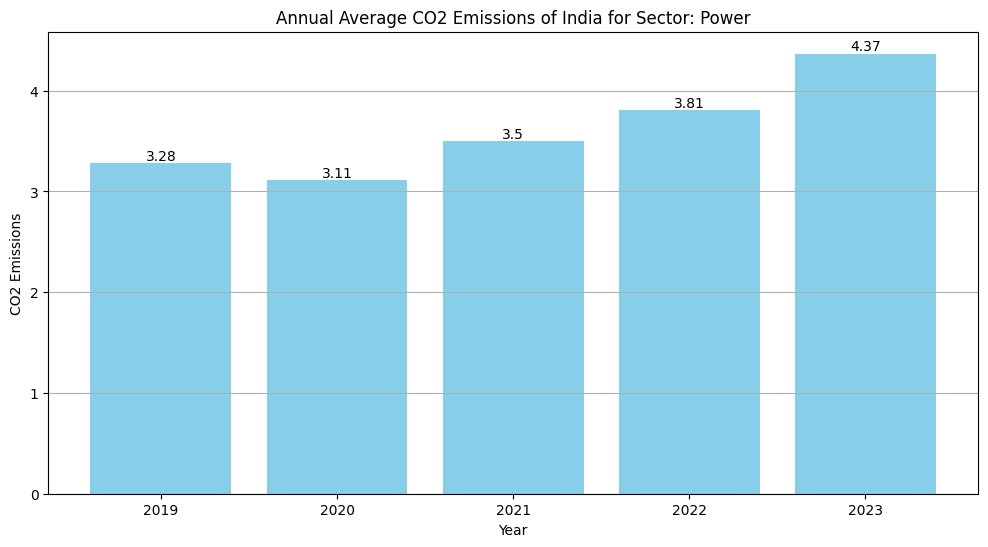

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your main DataFrame and has a DateTime index
# Filter data for India
df_india = df[df['country'] == 'India'].copy()  # Make a copy to avoid modifying a slice

# Ensure the index is DateTime
df_india.index = pd.to_datetime(df_india.index)

# Extract the year from the index and create a new column 'year'
df_india['year'] = df_india.index.year

# List all unique sectors in the data
sectors = df_india['sector'].unique()

# Create a bar plot for each sector
for sector in sectors:
    # Filter data for the current sector
    df_sector = df_india[df_india['sector'] == sector]
    
    # Group by year and calculate the mean CO2 emissions
    annual_emissions = df_sector.groupby('year')['value'].mean()
    
    # Plot bar chart for annual CO2 emissions for the current sector
    plt.figure(figsize=(12, 6))  # Set the size of the figure
    bars = plt.bar(annual_emissions.index, annual_emissions, color='skyblue')  # Create bar chart
    
    # Add data labels on each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
        # Add a label on top of each bar displaying the average emissions value.
    
    plt.title(f'Annual Average CO2 Emissions of India for Sector: {sector}')  # Set the title of the plot
    plt.xlabel('Year')  # Label the x-axis
    plt.ylabel('CO2 Emissions')  # Label the y-axis
    plt.grid(True, axis='y')  # Add a grid for the y-axis
    plt.show()  # Display the plot


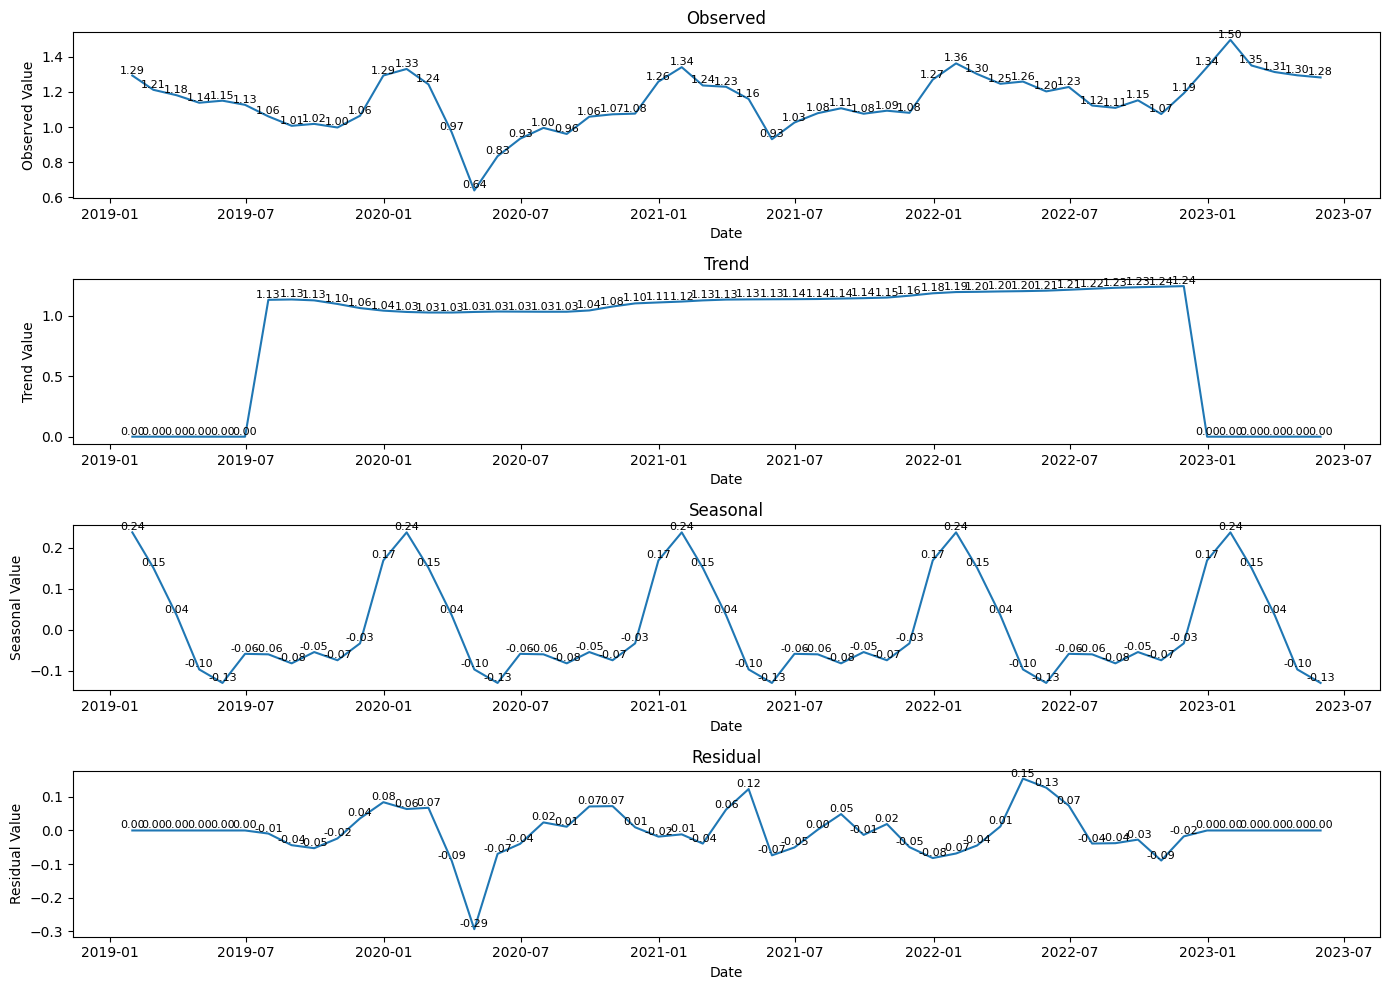

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is your main DataFrame and has a DateTime index
# Filter data for India
df_india = df[df['country'] == 'India'].copy()  # Make a copy to avoid modifying a slice

# Ensure the index is DateTime
df_india.index = pd.to_datetime(df_india.index)

# Resample data to monthly-end frequency to ensure enough data points for decomposition
df_monthly = df_india['value'].resample('ME').mean()

# Perform seasonal decomposition
result = seasonal_decompose(df_monthly, model='additive', period=12)

# Replace NaN or infinite values with a finite value (e.g., zero)
observed = result.observed.fillna(0).replace([np.inf, -np.inf], 0)
trend = result.trend.fillna(0).replace([np.inf, -np.inf], 0)
seasonal = result.seasonal.fillna(0).replace([np.inf, -np.inf], 0)
resid = result.resid.fillna(0).replace([np.inf, -np.inf], 0)

# Plot the decomposition with data labels
plt.figure(figsize=(14, 10))

def add_data_labels(ax, data):
    """Function to add data labels to each plot."""
    for x, y in zip(data.index, data):
        if np.isfinite(y):  # Only add label if y is finite
            ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8)

# Observed
ax1 = plt.subplot(411)
ax1.plot(observed, label='Observed')
ax1.set_xlabel('Date')  # X-axis label
ax1.set_ylabel('Observed Value')  # Y-axis label
plt.title('Observed')
add_data_labels(ax1, observed)

# Trend
ax2 = plt.subplot(412)
ax2.plot(trend, label='Trend')
ax2.set_xlabel('Date')  # X-axis label
ax2.set_ylabel('Trend Value')  # Y-axis label
plt.title('Trend')
add_data_labels(ax2, trend)

# Seasonal
ax3 = plt.subplot(413)
ax3.plot(seasonal, label='Seasonal')
ax3.set_xlabel('Date')  # X-axis label
ax3.set_ylabel('Seasonal Value')  # Y-axis label
plt.title('Seasonal')
add_data_labels(ax3, seasonal)

# Residual
ax4 = plt.subplot(414)
ax4.plot(resid, label='Residual')
ax4.set_xlabel('Date')  # X-axis label
ax4.set_ylabel('Residual Value')  # Y-axis label
plt.title('Residual')
add_data_labels(ax4, resid)

plt.tight_layout()
plt.show()


Image
Observed:
The observed data exhibits significant fluctuations. The values range from below 1.0 to as high as 1.9, with pronounced peaks and troughs, indicating the presence of strong seasonal and irregular components alongside the trend.
Trend:
The trend component shows a steep initial rise, stabilizing at around 1.1 before suddenly dropping to zero. This pattern indicates that while there was a long-term upward movement, there may have been a structural change or data anomaly towards the end of the period.
Seasonal:
The seasonal component is pronounced, with clear cyclical patterns repeating over time. The values oscillate between approximately -0.2 and 0.3, suggesting that seasonality plays a significant role in driving the observed data’s fluctuations.
Residual:
The residual component shows considerable variation. Although generally smaller than the seasonal and trend components, it captures some irregular patterns that are not explained by the trend or seasonality, indicating the presence of noise or randomness in the data.

Augmented Dickey-Fuller (ADF) Test
1. What is the ADF Test
The ADF test is a statistical test used to determine whether a time series has a unit root and is therefore non-stationary.
2. Why is This Important?

Stationarity: A time series is stationary if its statistical properties (mean, variance, autocorrelation) do not change over time. Stationary data is easier to model and forecast accurately.
Unit Root: A unit root indicates that a time series is non-stationary. This often means the data follows a random walk or has a trend, where shocks to the data have a permanent effect.
Random Walk: Imagine tracking the daily closing price of a stock. If the price consistently moves up or down without returning to a specific level, this is similar to a random walk and indicates a unit root.
Example: A series with a clear upward or downward trend over time, without a tendency to revert back to an average level, likely has a unit root.
What is a Unit Root?

A unit root is a characteristic of a time series that implies it is non-stationary. It means the series behaves like a random walk, where changes or shocks have a lasting impact on the data level.
4. How Does the ADF Test Work?

Test Regression Model:
formula search on google pls 

Testing Hypotheses:
Null Hypothesis (H₀): The data has a trend and is non-stationary.
Alternative Hypothesis (H₁): The data does not have a trend and is stationary.
4. What Are We Looking For?

We run a test that gives us a number (the ADF statistic) and a probability (the p-value).
Small p-value (usually ≤ 0.05): This suggests that the data is stationary (no clear trend).
Large p-value (greater than 0.05): This suggests that the data is non-stationary (has a trend).
5. Why Does This Matter?

For Modeling: Many forecasting methods assume data is stationary. If your data isn’t stationary, you might need to adjust it before using these methods.
For Understanding Trends: Knowing if data is stationary or not helps in understanding whether there are significant trends or changes over time.


In [149]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller  # Import the ADF test function

# Assuming df is your main DataFrame and has a DateTime index
# This DataFrame 'df' is assumed to have a DateTime index and at least two columns: 'country' and 'value'.

# Step 1: Filter data for India
df_india = df[df['country'] == 'India'].copy()  # Make a copy to avoid modifying a slice
# This line filters the DataFrame to only include rows where the 'country' column is 'India'.
# The .copy() method ensures that a new DataFrame is created, avoiding issues with chained indexing,
# which can sometimes raise warnings or lead to unexpected behavior.

# Step 2: Ensure the index is DateTime
df_india.index = pd.to_datetime(df_india.index)
# This line converts the DataFrame's index into a DateTime object, ensuring that the index is correctly recognized as dates.
# This is important for resampling data based on time.

# Step 3: Resample to monthly-end frequency and calculate the mean
df_monthly = df_india['value'].resample('ME').mean()
# Resampling is used to convert the time series data into a new frequency.
# 'ME' stands for month-end frequency, so it groups the data by the end of each month.
# The .mean() method calculates the mean value for each month after resampling.

# Step 4: Perform the Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(df_monthly.dropna())  # Drop NaN values before the test
# The adfuller() function performs the Augmented Dickey-Fuller test on the time series.
# The dropna() method removes any missing values (NaNs) from the series before running the test, as the ADF test cannot handle NaN values.

# Step 5: Display the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])
print('Number of Lags Used:', adf_result[2])
print('Number of Observations Used:', adf_result[3])
# The results of the ADF test are stored in a tuple. These lines print the key values from the test result:
# adf_result[0]: ADF Statistic - This is the test statistic value.
# adf_result[1]: p-value - This value helps determine whether to reject the null hypothesis.
# adf_result[4]: Critical Values - These are threshold values at common significance levels (1%, 5%, 10%).
# adf_result[2]: Number of Lags Used - The number of lags used in the test.
# adf_result[3]: Number of Observations Used - The number of data points included in the test.

# Interpret the results
if adf_result[1] <= 0.05:
    print("The time series is likely stationary (p-value <= 0.05).")
else:
    print("The time series is likely non-stationary (p-value > 0.05).")
# This block interprets the p-value from the ADF test:
# If the p-value is less than or equal to 0.05, we reject the null hypothesis, which indicates that the time series is likely stationary.
# If the p-value is greater than 0.05, we fail to reject the null hypothesis, suggesting that the time series is non-stationary.


ADF Statistic: -3.6423398799522735
p-value: 0.005001303076864882
Critical Values: {'1%': np.float64(-3.5656240522121956), '5%': np.float64(-2.920142229157715), '10%': np.float64(-2.598014675124952)}
Number of Lags Used: 1
Number of Observations Used: 51
The time series is likely stationary (p-value <= 0.05).


ADF Test Results Summary
1. ADF Statistic: -3.642

Measures how strongly the time series suggests stationarity. More negative values indicate stronger evidence of stationarity.
2. p-Value: 0.005

The probability of getting a test statistic as extreme as this if the null hypothesis (that the series is non-stationary) is true. A small p-value (≤ 0.05) suggests the series is stationary.
3. Critical Values:

1% Critical Value: -3.566
5% Critical Value: -2.920
10% Critical Value: -2.598
These values are thresholds to compare against the ADF statistic to decide if the test statistic is significantly different from what would be expected if the null hypothesis were true.
4. Number of Lags Used: 1

Refers to including the previous time period's value in the model to account for autocorrelation.
Meaning of Lag (In Simple Terms)
Lag: Refers to using past values of the time series in the analysis. For example, if you're looking at today’s data, a "lag 1" would be the data from yesterday. It helps capture the influence of previous observations on current values.
Meaning of Autocorrelation (In Simple Terms)
Autocorrelation: Measures how a time series is correlated with its past values. If today's data is similar to yesterday's data, there is positive autocorrelation. If it's different, there might be negative autocorrelation. High autocorrelation at lag 1 means that today's value is strongly related to yesterday's value.

5. Number of Observations Used: 51

The total data points considered in the test.
Interpretation
The ADF statistic of -3.642 is more negative than all the critical values (1%, 5%, and 10%). This means you reject the null hypothesis at all these levels.
The p-value of 0.005 is less than 0.05, reinforcing that you should reject the null hypothesis.
Conclusion
Stationarity: Your data is likely stationary, meaning its mean and variance are stable over time, and it does not show a trend or random walk.
Implications
Modeling: You can use models that assume stationarity, like ARIMA, without needing to adjust the data further.


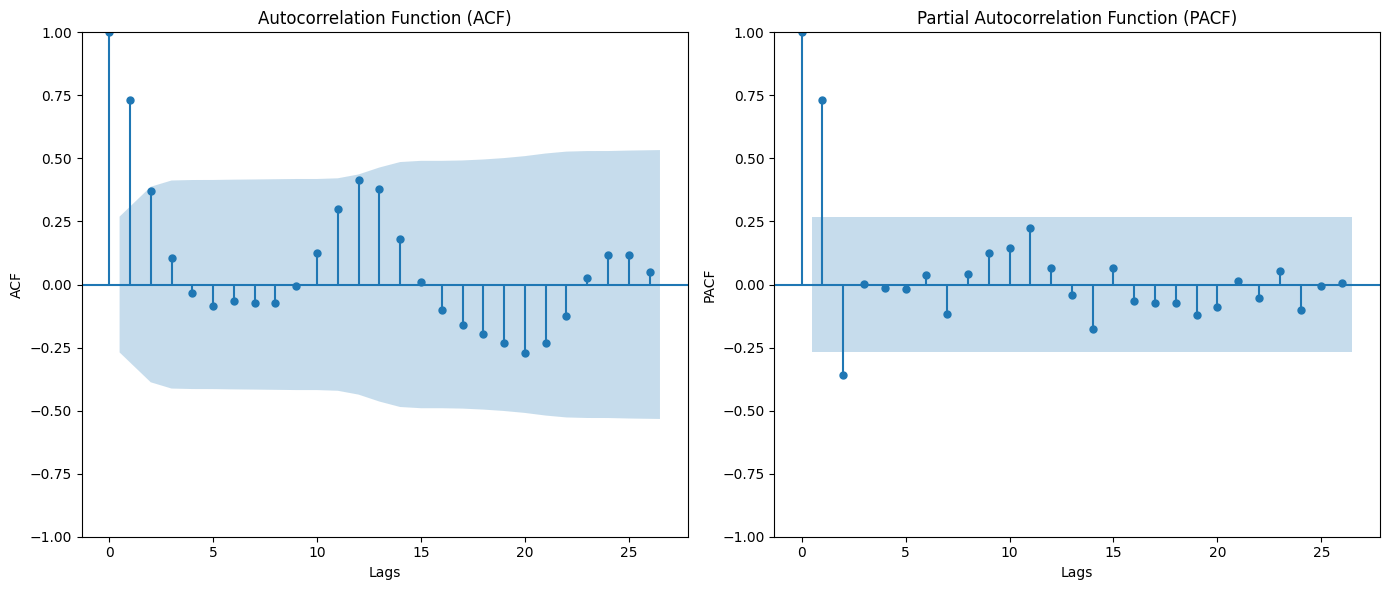

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example: Load or prepare your CO2 emissions data for India
# Assuming 'df' is your main DataFrame and 'value' column contains CO2 emissions
# Ensure 'date' is the index and in datetime format
df.index = pd.to_datetime(df.index)

# Filter data for India
df_india = df[df['country'] == 'India'].copy()  # Make a copy to avoid modifying a slice

# Resample the data to monthly frequency if it's not already (assuming monthly data)
df_india_monthly = df_india['value'].resample('ME').mean()

# Determine the number of observations
n = len(df_india_monthly.dropna())

# Choose lags based on the sample size
max_lags = min(40, n // 2)

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

# Plot ACF
plt.subplot(121)
plot_acf(df_india_monthly.dropna(), lags=max_lags, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')  # Label for the x-axis
plt.ylabel('ACF')   # Label for the y-axis

# Plot PACF
plt.subplot(122)
plot_pacf(df_india_monthly.dropna(), lags=max_lags, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')  # Label for the x-axis
plt.ylabel('PACF')  # Label for the y-axis

plt.tight_layout()
plt.show()


Autocorrelation Function (ACF)
What it is: The ACF plot shows how today's CO2 emissions are related to previous days, weeks, or months of emissions. Each "lag" in the plot represents a different time gap. For example, lag 1 could be yesterday, lag 2 could be two days ago, and so on.

Interpretation:
Y-axis (Correlation Values): This tells us how similar today's CO2 emissions are to previous days. A value near 1 means today's emissions are very similar to past values, while a value near 0 means there's no strong connection.
X-axis (Lags): These are the different time gaps we’re looking at.
Blue Shaded Area: This shows the range where the correlation is considered insignificant (not very meaningful). If the bar stays inside this area, it means there’s no strong connection for that particular lag.
What you see in the ACF plot:

Early Lags (up to Lag 5): You see strong correlations. This suggests that today's CO2 emissions are quite similar to the emissions from the last few days. This could mean that factors affecting CO2 emissions tend to have a short-term impact.
Later Lags (after Lag 6): The correlations drop into the blue area, indicating that emissions from more than a week ago don’t strongly affect today's emissions. This suggests that the influence of earlier emissions weakens as time goes on.
Partial Autocorrelation Function (PACF)
What it is: The PACF plot also looks at how today's CO2 emissions are related to previous days, but it removes the effects of the days in between. This gives a clearer picture of which specific days have a direct impact on today's emissions.

Interpretation:
Y-axis (Partial Correlation Values): Like the ACF, this shows how similar today's emissions are to past emissions, but only for a specific lag after accounting for the influence of the days in between.
X-axis (Lags): These represent different days in the past.
Bars and Blue Area: Bars outside the blue area indicate a significant relationship between today's emissions and the emissions from that specific lag.
What you see in the PACF plot:

Lag 1: Shows a strong correlation, meaning yesterday’s emissions have a strong direct impact on today’s emissions.
Lags 2 and 3: Also show some correlation, but it's weaker than Lag 1. This suggests that emissions from two or three days ago still influence today’s emissions, but not as strongly as yesterday’s.
Beyond Lag 3: Most of the bars are inside the blue area, meaning emissions from more than three days ago don’t have a strong direct effect on today's emissions after considering the influence of more recent days.
How to Use These Plots for CO2 Emission Analysis
Understanding Patterns: If you're trying to forecast future CO2 emissions, these plots help you see how much past emissions (from different days) should be considered in your model.
ACF: If you see that today’s emissions are strongly related to emissions from the last few days but not much further back, it suggests a pattern where recent days are more relevant.
PACF: If the first few lags show strong correlations but then quickly drop off, you might only need to consider emissions from the last couple of days to make accurate predictions.
 Summary
ACF: Think of this as a way to see if today’s CO2 emissions are similar to emissions from recent days. It helps you understand how long past emissions continue to influence today.
PACF: This helps you figure out if certain specific days (like yesterday or two days ago) directly affect today’s emissions, ignoring other days in between.
Overall: These plots suggest that recent CO2 emissions (like in the last few days) are more important for predicting today’s emissions, and older emissions have less influence.

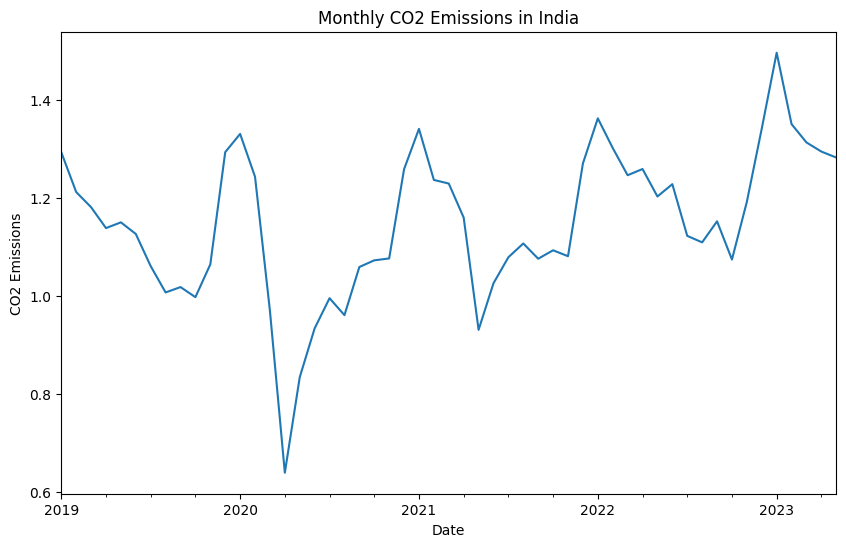

In [158]:
df_india_monthly.plot(figsize=(10, 6))
plt.title('Monthly CO2 Emissions in India')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')
plt.show()


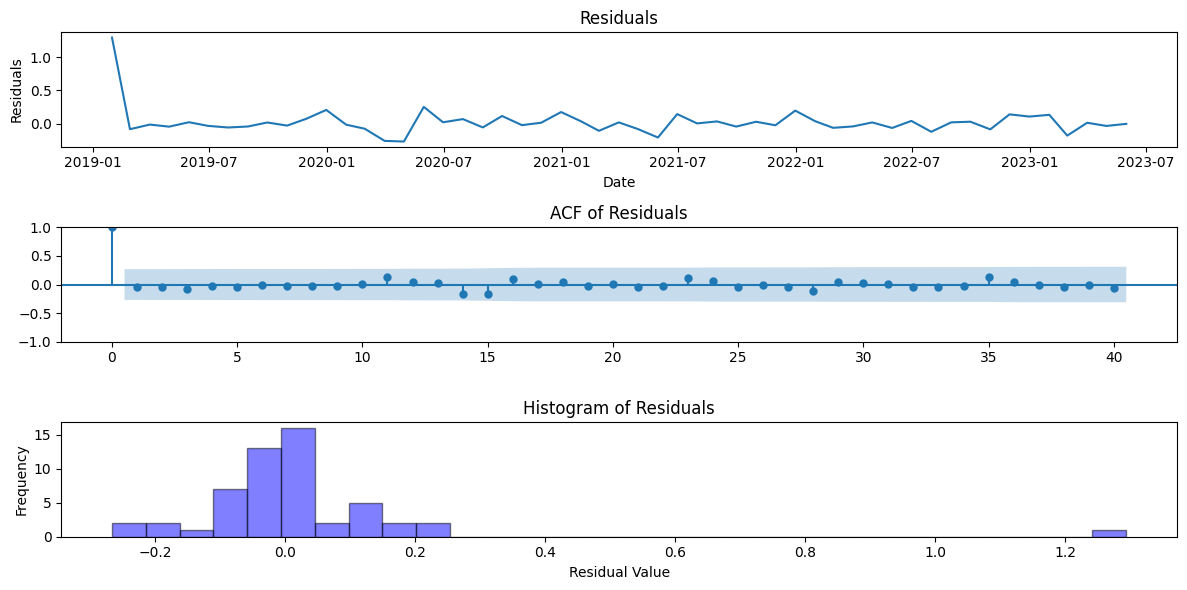

Ljung-Box Test Results:
     lb_stat  lb_pvalue
10  0.929614   0.999877
Shapiro-Wilk Test Statistic: 0.5853840470181082
Shapiro-Wilk Test p-value: 5.414436561557893e-11


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Assuming df_india_monthly is your monthly CO2 emissions data
# Fit ARIMA model (example parameters)
p, d, q = 1, 1, 1
model = ARIMA(df_india_monthly, order=(p, d, q))
model_fit = model.fit()

# Extract residuals
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')

# ACF of Residuals
plt.subplot(312)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')

# Histogram and Normal Q-Q Plot
plt.subplot(313)
plt.hist(residuals, bins=30, alpha=0.5, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Ljung-Box Test
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print('Ljung-Box Test Results:')
print(ljung_box_test)

# Normality Test (Shapiro-Wilk)
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test.statistic}')
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')


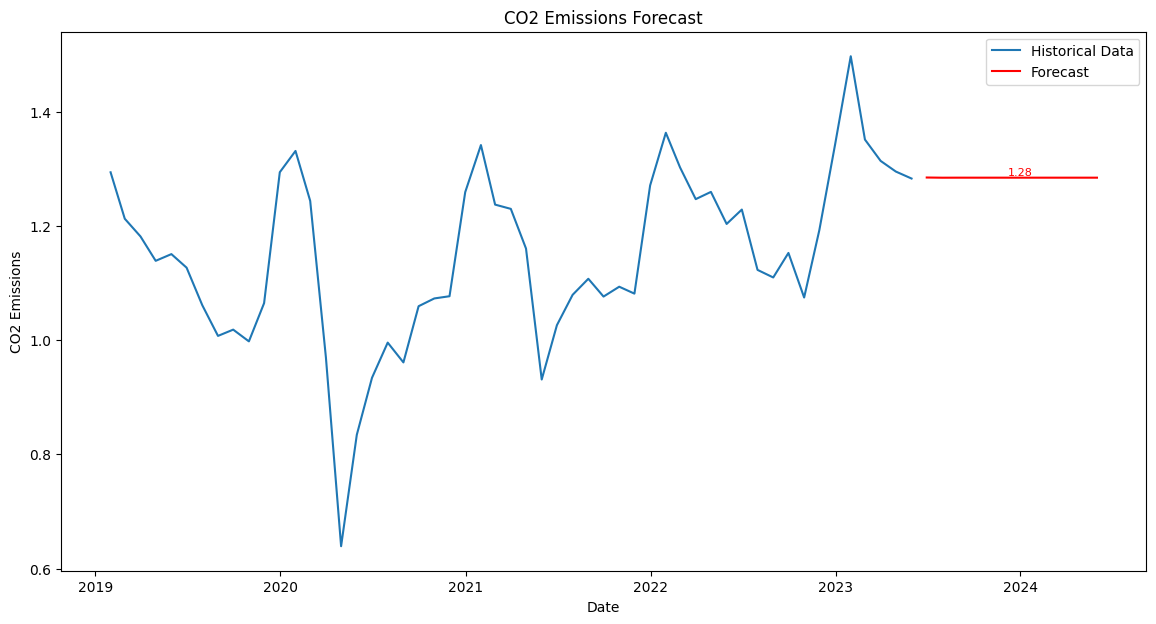

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_india_monthly is your monthly CO2 emissions data

# Fit ARIMA model (example parameters, adjust as needed)
p, d, q = 1, 1, 1
model = ARIMA(df_india_monthly, order=(p, d, q))
model_fit = model.fit()

# Generate forecasts
forecast_steps = 12  # Number of steps to forecast ahead
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_india_monthly.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Create DataFrame for forecasts
forecast_df = pd.DataFrame(data={'Forecast': forecast}, index=forecast_index)

# Plot historical data and forecasts
plt.figure(figsize=(14, 7))
plt.plot(df_india_monthly, label='Historical Data')
plt.plot(forecast_df, label='Forecast', color='red')

# Add data labels only for year-end forecast points
for x, y in zip(forecast_df.index, forecast_df['Forecast']):
    if x.month == 12:  # Check if the month is December
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='red')

plt.xlabel('Date')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions Forecast')
plt.legend()
plt.show()



In [173]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_india_monthly is your historical monthly CO2 emissions data

# Fit ARIMA model on the entire historical data
p, d, q = 1, 1, 1  # Replace with your optimal parameters
model = ARIMA(df_india_monthly, order=(p, d, q))
model_fit = model.fit()

# Get in-sample predictions
in_sample_predictions = model_fit.fittedvalues
in_sample_index = df_india_monthly.index
in_sample_df = pd.DataFrame(data={'Fitted': in_sample_predictions}, index=in_sample_index)

# Calculate performance metrics on the in-sample data
mae = mean_absolute_error(df_india_monthly, in_sample_df['Fitted'])
mse = mean_squared_error(df_india_monthly, in_sample_df['Fitted'])
rmse = np.sqrt(mse)

print("sample")
print(f' Mean Absolute Error (MAE): {mae}')
print(f' Mean Squared Error (MSE): {mse}')
print(f' Root Mean Squared Error (RMSE): {rmse}')


sample
 Mean Absolute Error (MAE): 0.1001916427058246
 Mean Squared Error (MSE): 0.0423286146367732
 Root Mean Squared Error (RMSE): 0.20573919081393607
